##  Importing requirements

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
data.shape

(1030, 9)

> Seems like a small dataset with 1030 datapoint for 9 features

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


> There is no categorical data present, all are numerical values

In [5]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


The features **ash**, **superplastic**, **age** seems to be right skewed data. 

The dependent variable **strength** tends to follow a gausian distribution

In [6]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There is no Null values 

## Correlation heatmap

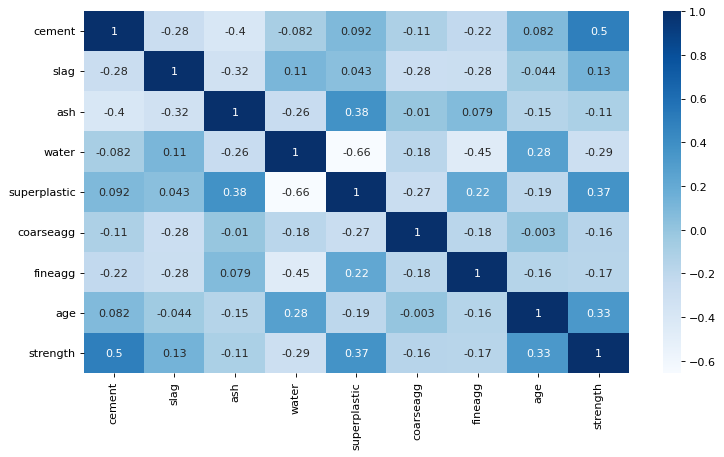

In [7]:
figure(figsize=(11, 6), dpi=80)
sns.heatmap(data.corr(), annot=True, cmap='Blues')

> the features cement and strength is found to be 50% corelated. As we know, cement is the most important independent variable.

> The feature superplastic is 37% corelated with strength. and 38% corelated with ash.

> Age is also corelated with streagth (33%) and water(28%).

> superplastic has very strong negative corelation with water (-66%) 

## Lineplot | cement vs strength

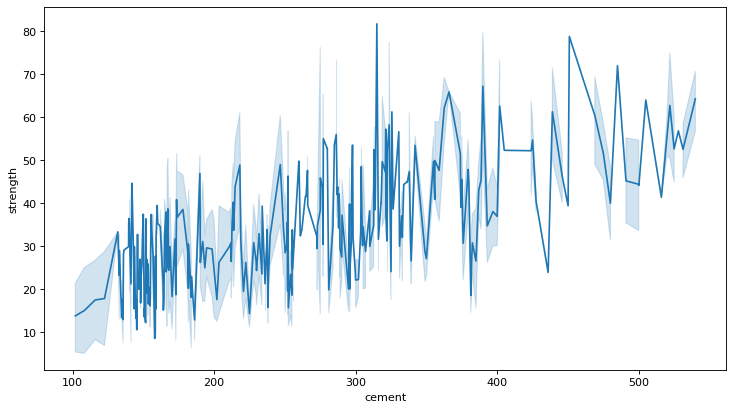

In [8]:
figure(figsize=(11, 6), dpi=80)
sns.lineplot(x='cement', y='strength', data=data)

> As we found 50% corelated, strength eventually increases with increase in cement, But max stregth is achieved with 250-350 of cement value 

## Histplot | Strength

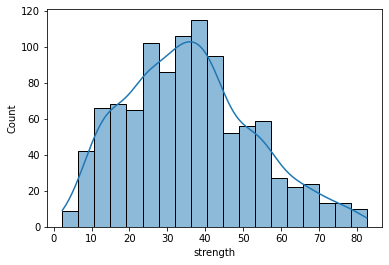

In [9]:
sns.histplot(data.strength, kde=True)

> We can see a normal / Gausian distribution in the dependent variable which is desiresed

## Scatter plot ||   cement vs strength | water | age

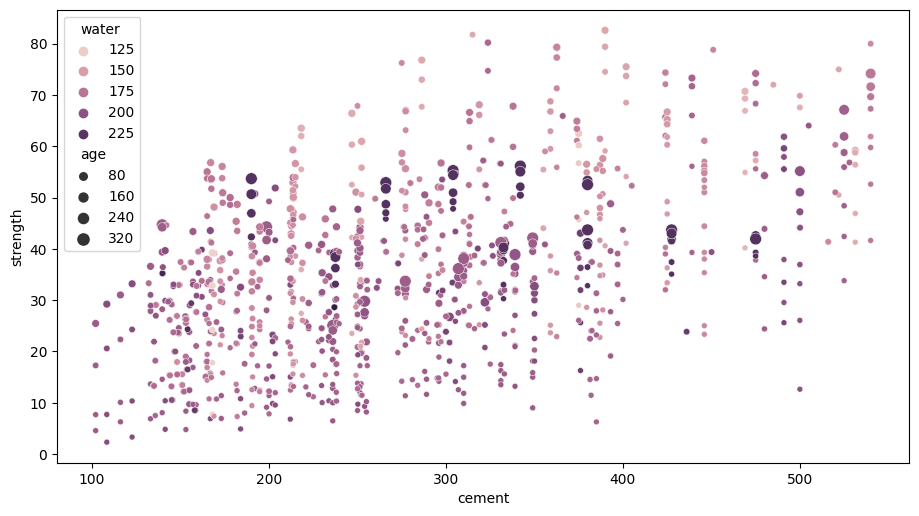

In [10]:
figure(figsize=(11, 6), dpi=100)
sns.scatterplot(x='cement', y='strength', hue='water', size='age', data=data)

> **strength eventually grows with increase in cement** as we can see, the graph goes up when we move toward rigth.

> **Max strength is achieved with low amount of water** towards the top of max streangth, the water values is shaded the least. 

> **Strength increses with age** as the age is represted with the size of the circles, not in all the cases

>**Older the cement is more water is requied** the large size data point are often darker in colour

## Scatter plot || FineAgg vs strength | Ash | Superplastic

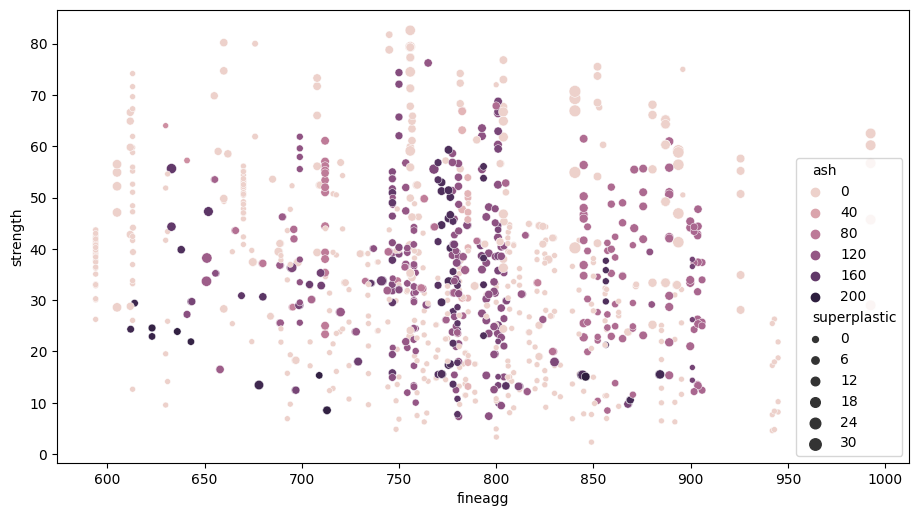

In [11]:
figure(figsize=(11, 6), dpi=100)
sns.scatterplot(x='fineagg', y='strength', hue='ash', size='superplastic', data=data)

> **Strength decreased with increase in ash** as the darker points are somewhat located on the lower strength region.

> **Majority of data is with low ash** most of the data points are ligther in colour.

> **strength increases with superplastic** as the points on the upper regions tends to be larger.

## Data preprocessing

In [30]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(f'Train data >> {len(X_train)}')
print(f'Train data >> {len(X_test)}')

Train data >> 721
Train data >> 309


In [31]:
std = StandardScaler()
scaled_xtrain = std.fit_transform(X_train)
scaled_xtest = std.transform(X_test)

## Model creation

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

models = [
    LinearRegression(), 
    Lasso(), 
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100),
    KNeighborsRegressor(),
    SVR(),
    GradientBoostingRegressor() 
]

Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

Create a data frame that will store the results for all 5 trials of the 8 different models

In [15]:
def model_training_cv(models, cv, scoring):
  entries= {}
  mse, rmse, mae, r2, model_name_col , index = [],[],[],[],[],[]
  count = 0

  for model in models:
    model_name = model.__class__.__name__
    results = cross_validate(model, scaled_xtrain, y_train, scoring=scoring, cv=CV )

    for i in range(CV):
      index.append(count)
      mse.append(results['test_mse'][i])
      mae.append(results['test_mae'][i])
      rmse.append(results['test_rmse'][i])
      r2.append(results['test_r2'][i])
      model_name_col.append(model.__class__.__name__)
      count+=1

  entries['index'] = index
  entries['Model_name'] = model_name_col
  entries['R2_score'] = r2
  entries['MAE'] = mae
  entries['MSE'] = mse
  entries['RMSE'] = rmse

  return pd.DataFrame(entries)


In [32]:
CV = 5
scoring = {
    'mse': 'neg_mean_squared_error',
    'rmse': 'neg_root_mean_squared_error',
    'mae' : 'neg_mean_absolute_error',
    'r2': 'r2'
}

training_results = model_training_cv(models, CV, scoring)
training_results.groupby('Model_name').R2_score.mean().reset_index()

,Model_name,R2_score
0,DecisionTreeRegressor,0.795398
1,GradientBoostingRegressor,0.898893
2,KNeighborsRegressor,0.696517
3,Lasso,0.602162
4,LinearRegression,0.635870
5,RandomForestRegressor,0.895506
6,Ridge,0.636099
7,SVR,0.599420


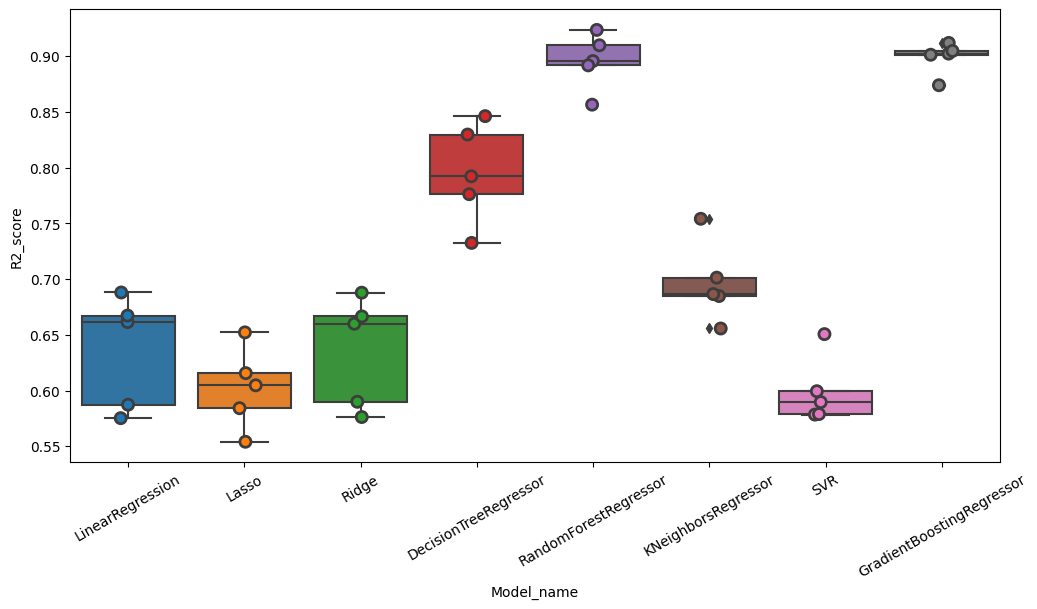

In [33]:
figure(figsize=(12, 6), dpi=100)
sns.boxplot(x='Model_name', y='R2_score', data=training_results)
sns.stripplot(x='Model_name', y='R2_score', data=training_results, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(X =training_results ,  rotation=30)
plt.show()

> Gradient Boosting, Random Forest out performed all the other algos

In [34]:
training_results[training_results['Model_name']=='GradientBoostingRegressor']

,index,Model_name,R2_score,MAE,MSE,RMSE
35,35,GradientBoostingRegressor,0.902369,-4.102771,-30.168207,-5.492559
36,36,GradientBoostingRegressor,0.911979,-3.671560,-25.747084,-5.074158
37,37,GradientBoostingRegressor,0.904777,-3.734187,-25.417497,-5.041577
38,38,GradientBoostingRegressor,0.873987,-4.111943,-33.500129,-5.787930
39,39,GradientBoostingRegressor,0.901354,-4.111001,-28.368750,-5.326232


In [35]:
training_results[training_results['Model_name']=='RandomForestRegressor']

,index,Model_name,R2_score,MAE,MSE,RMSE
20,20,RandomForestRegressor,0.923628,-3.653148,-23.599272,-4.857908
21,21,RandomForestRegressor,0.895676,-3.730301,-30.515908,-5.524121
22,22,RandomForestRegressor,0.909843,-3.608436,-24.065147,-4.905624
23,23,RandomForestRegressor,0.856562,-4.369028,-38.132461,-6.175149
24,24,RandomForestRegressor,0.891823,-4.041192,-31.109743,-5.577611


In [36]:
training_results['Model_name'].unique()

array(['LinearRegression', 'Lasso', 'Ridge', 'DecisionTreeRegressor',
       'RandomForestRegressor', 'KNeighborsRegressor', 'SVR',
       'GradientBoostingRegressor'], dtype=object)

## Hyperparameter Tunning

> Random Forest Regressor

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
            "n_estimators"      : [10,50,100,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [22]:
def gridsearch(estimator, params):
  grid = GridSearchCV(estimator, params, n_jobs=-1, cv=5)
  grid.fit(scaled_xtrain, y_train)
  return grid.best_score_, grid.best_params_

def hypertune_RFR(count, estimator, params):
  for i in range(count):
    best_score, best_params = gridsearch(estimator, params)
    print ('\n'+f'--------- Loop >> {i+1}---------')
    print(f'Best score >> {best_score}')
    print(f'Best params >> {best_params}')

In [37]:
hypertune_RFR(5,RandomForestRegressor(), param_grid)


--------- Loop >> 1---------
Best score >> 0.9036405801560228
Best params >> {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}

--------- Loop >> 2---------
Best score >> 0.9034959874144475
Best params >> {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}

--------- Loop >> 3---------
Best score >> 0.9033691880022502
Best params >> {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}

--------- Loop >> 4---------
Best score >> 0.9034446283048382
Best params >> {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}

--------- Loop >> 5---------
Best score >> 0.9031050840568066
Best params >> {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}


> After hypertunning Random Forest Reg, we got an accuracy of **90.3%** to the max

In [38]:
param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

def hypertune_GBR(count, estimator, params):
  for i in range(count):
    best_score, best_params = gridsearch(estimator, params)
    print ('\n' + f'--------- Loop >> {i+1}---------')
    print(f'Best score >> {best_score}')
    print(f'Best Params >> {best_params}')            

In [39]:
hypertune_GBR(5,GradientBoostingRegressor(), param_grid)


--------- Loop >> 1---------
Best score >> 0.9172878921431833
Best Params >> {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 500}

--------- Loop >> 2---------
Best score >> 0.9170022127017852
Best Params >> {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 500}

--------- Loop >> 3---------
Best score >> 0.9171550032432894
Best Params >> {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 500}

--------- Loop >> 4---------
Best score >> 0.9173865743646497
Best Params >> {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 500}

--------- Loop >> 5---------
Best score >> 0.9168169631455942
Best Params >> {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 500}


> After hypertunning Gradiant Boosting Reg, we got an accuracy of **91.7%** to the max

## Applying the model on Training dataset

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, max_features= 1.0, min_samples_leaf= 3, n_estimators= 500)
model_gbr.fit(scaled_xtrain, y_train)
y_pred_gbr = model_gbr.predict(scaled_xtest)
print("Model\t\t\t\t RMSE \t\t R2"+'\n') 
print("""Gradiant Boosting Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_gbr)), r2_score(y_test, y_pred_gbr)))

Model				 RMSE 		 R2

Gradiant Boosting Regressor 	 4.23 		0.93


In [43]:
model_rfr = RandomForestRegressor(bootstrap = False,max_features= 'log2', min_samples_split= 2, n_estimators= 200)
model_rfr.fit(scaled_xtrain, y_train)
y_pred_rfr = model_rfr.predict(scaled_xtest)
print("Model\t\t\t\t RMSE \t\t R2"+'\n') 
print("""Random Forest Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_rfr)), r2_score(y_test, y_pred_rfr)))

Model				 RMSE 		 R2

Random Forest Regressor 	 5.24 		0.90


>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


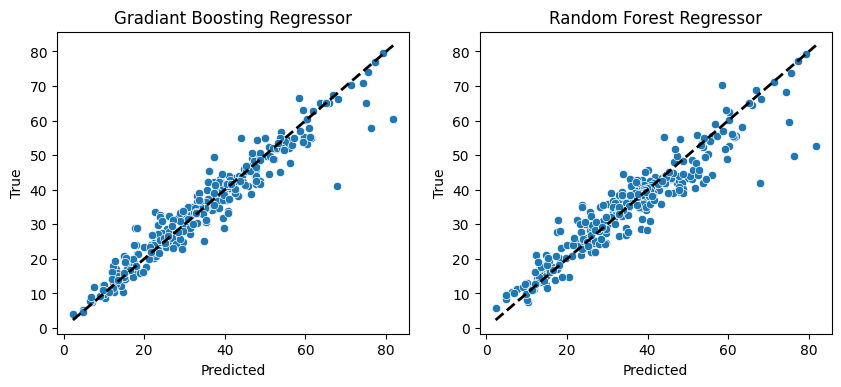

In [44]:
figure(figsize=(10, 4), dpi=100)

plt.subplot(1, 2, 1)
sns.scatterplot(y_test, y_pred_gbr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Gradiant Boosting Regressor") 

plt.subplot(1, 2, 2)
sns.scatterplot(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()


In [45]:
columns = data.columns
def autolabel(rects): 
   """Attach a text label above each bar in *rects*, displaying its height.""" 
   for rect in rects: 
      height = rect.get_height() 
      ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

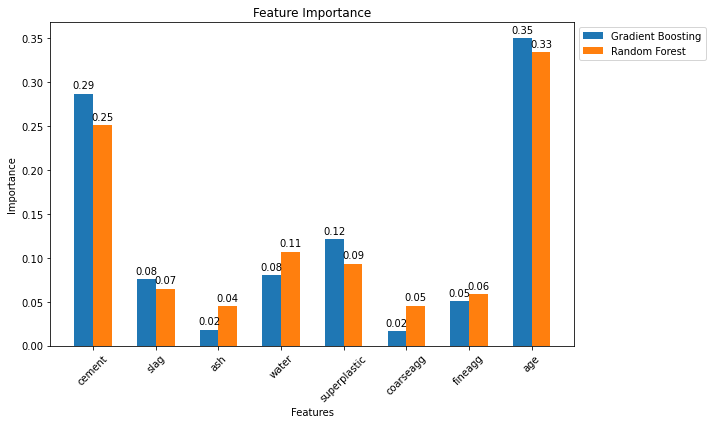

In [47]:
feature_dtr = model_gbr.feature_importances_ 
feature_rfr = model_rfr.feature_importances_ 

labels = columns[:-1] 
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Gradient Boosting') 
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest') 
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 
autolabel(rects1) 
autolabel(rects2) 
fig.tight_layout() 
plt.show()

> Cement and age are given the most importance.

> Ash, coarseagg, fineagg is given least importance.

### Model for deploy

In [56]:
scaled_X = std.fit_transform(X)
gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, max_features= 1.0, min_samples_leaf= 3, n_estimators= 500)
result = cross_validate(gbr, scaled_X, y, scoring='r2', cv=5 )
result['test_score'].mean()

0.932697277218353

In [57]:
model = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, max_features= 1.0, min_samples_leaf= 3, n_estimators= 500)
model.fit(scaled_X, y)

GradientBoostingRegressor(max_depth=4, max_features=1.0, min_samples_leaf=3,
                          n_estimators=500)

### Exporting the fine tunned GBR for for deployment

In [48]:
import pickle
pickle.dump(model, open('prediction_model.pkl','wb'))